## Mô hình dự đoán quản lý chi tiêu 

Thông tin thành viên
| MSSV     | Họ và Tên        | Email                   |
|----------|------------------|-------------------------|
| 22520033 | Trương Huỳnh Thúy An | 22520033@gm.uit.edu.vn |
| 22520083 | Trịnh Thị Lan Anh  | 22520083@gm.uit.edu.vn |
| 22520148 | Huỳnh Thị Hải Châu  | 22520148@gm.uit.edu.vn |
| 22520363 | Lê Văn Giáp    | 22520363@gm.uit.edu.vn |
| 22520375 | Vương Dương Thái Hà | 22520375@gm.uit.edu.vn |


### Import Libraray

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense   
from tensorflow.keras.models import load_model

In [2]:
data = pd.read_csv("data.csv", encoding='latin-1')
data

,Thu nhap,Co dinh,Nhu cau,Giao duc,Thanh toan no,Tiet kiem,Ban than,a,b,c,d,e,f
0,7550000,3180000,0,1,0,1,0,0.441192,0.396550,0.021725,0.129350,0.000000,0.011183
1,7350000,2410000,0,1,0,0,1,0.347891,0.111428,0.384311,0.127250,0.000000,0.029119
2,7750000,2400000,0,0,0,1,0,0.329677,0.335039,0.137593,0.106540,0.000000,0.091150
3,7250000,3420000,0,1,0,1,0,0.491724,0.334125,0.024972,0.098846,0.000000,0.050333
4,9000000,2340000,0,1,0,1,0,0.280000,0.343637,0.149464,0.127305,0.000000,0.099593
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17494,137131000,12920000,0,1,7000000,0,1,0.104216,0.111008,0.380439,0.307082,0.051046,0.046208
17495,122268000,11900000,1,0,0,0,1,0.107327,0.057408,0.385542,0.392218,0.000000,0.057505
17496,126996000,8290000,1,1,0,1,1,0.075278,0.244077,0.391119,0.289073,0.000000,0.000453
17497,191536000,6780000,1,1,0,1,1,0.045398,0.327679,0.345730,0.224782,0.000000,0.056410


In [3]:
data.isnull().sum()

Thu nhap         0
Co dinh          0
Nhu cau          0
Giao duc         0
Thanh toan no    0
Tiet kiem        0
Ban than         0
a                0
b                0
c                0
d                0
e                0
f                0
dtype: int64

In [4]:
data = data.dropna()
data.isnull().sum()

Thu nhap         0
Co dinh          0
Nhu cau          0
Giao duc         0
Thanh toan no    0
Tiet kiem        0
Ban than         0
a                0
b                0
c                0
d                0
e                0
f                0
dtype: int64

### Split Data

In [5]:
X = np.array(data)[:,0:7]
Y = np.array(data)[:,7:13]
print(X)
print(Y)

[[7.55000e+06 3.18000e+06 0.00000e+00 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 [7.35000e+06 2.41000e+06 0.00000e+00 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 [7.75000e+06 2.40000e+06 0.00000e+00 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 ...
 [1.26996e+08 8.29000e+06 1.00000e+00 ... 0.00000e+00 1.00000e+00
  1.00000e+00]
 [1.91536e+08 6.78000e+06 1.00000e+00 ... 0.00000e+00 1.00000e+00
  1.00000e+00]
 [1.86326e+08 1.49300e+07 1.00000e+00 ... 0.00000e+00 1.00000e+00
  1.00000e+00]]
[[0.44119205 0.39654965 0.02172527 0.12934956 0.         0.01118347]
 [0.34789116 0.11142825 0.38431147 0.12725029 0.         0.02911883]
 [0.32967742 0.33503878 0.13759292 0.10654045 0.         0.09115043]
 ...
 [0.07527765 0.24407673 0.39111929 0.28907334 0.         0.00045299]
 [0.04539805 0.32767927 0.34573048 0.22478211 0.         0.05641009]
 [0.09012838 0.23935503 0.38400525 0.26484701 0.         0.02166433]]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ",y_train.shape)
print("Y_test: ", y_test.shape)


X_train:  (13999, 7)
X_test:  (3500, 7)
Y_train:  (13999, 6)
Y_test:  (3500, 6)


### Descale Data

In [7]:
# Tính các giá trị thống kê cơ bản
mean = np.mean(X_train, axis=0)
median = np.median(X_train, axis=0)
std_dev = np.std(X_train, axis=0)
min_val = np.min(X_train, axis=0)
max_val = np.max(X_train, axis=0)

# Tạo DataFrame từ các giá trị thống kê
statics_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Std Dev': std_dev,
    'Min Value': min_val,
    'Max Value': max_val
})

# Xếp chúng thành các hàng của các cột
statics_transpose = statics_df.transpose()

# In DataFrame đã xếp
print(statics_transpose)

                      0             1         2         3             4  \
Mean       9.456187e+07  1.916577e+07  0.416387  0.627259  2.161469e+06   
Median     8.756000e+07  1.369000e+07  0.000000  1.000000  0.000000e+00   
Std Dev    5.506793e+07  1.459839e+07  0.492959  0.483534  5.267935e+06   
Min Value  3.200000e+06  2.000000e+06  0.000000  0.000000  0.000000e+00   
Max Value  1.999660e+08  7.200000e+07  1.000000  1.000000  5.400000e+07   

                  5        6  
Mean       0.618330  0.73641  
Median     1.000000  1.00000  
Std Dev    0.485796  0.44058  
Min Value  0.000000  0.00000  
Max Value  1.000000  1.00000  


In [8]:
def de_scale(data_scale):
    for i in range(len(data_scale)):
        data_scale[i] = data_scale[i] * (max_val[i] - min_val[i]) + min_val[i]
    return data_scale

### Preprocessing Data

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def ScalerData(data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

In [10]:
X_train = ScalerData(X_train)
X_test = ScalerData(X_test)
print(X_train)
print(X_test)

[[0.41516319 0.23328571 0.         ... 0.         1.         1.        ]
 [0.41450251 0.23928571 1.         ... 0.         1.         1.        ]
 [0.82259638 0.07814286 0.         ... 0.18518519 1.         1.        ]
 ...
 [0.19800169 0.35928571 0.         ... 0.01851852 0.         0.        ]
 [0.07826555 0.03571429 0.         ... 0.         0.         1.        ]
 [0.6395668  0.15557143 0.         ... 0.         1.         1.        ]]
[[0.0365385  0.02459016 0.         ... 0.         0.         1.        ]
 [0.43498702 0.51360965 1.         ... 0.         0.         1.        ]
 [0.35036079 0.60532014 0.         ... 0.         1.         0.        ]
 ...
 [0.39374706 0.28348283 0.         ... 0.         1.         1.        ]
 [0.85868032 0.11042376 1.         ... 0.         1.         1.        ]
 [0.97255269 0.09712341 1.         ... 0.07843137 0.         1.        ]]


### Define model Neural Network

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adamax

def define_model():
    model = Sequential()
    
    # Layer 1
    model.add(Dense(256, input_dim=7, activation='relu'))
    
    # Layer 2
    model.add(Dense(512, activation='relu'))
    
    # Layer 3
    model.add(Dense(512, activation='relu'))

    # Layer 4
    model.add(Dense(6, activation='relu'))
    
    optimizer = Adamax(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return model

model = define_model()
model.summary()


c:\Users\vuong\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 399,366 (1.52 MB)

 Trainable params: 399,366 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from sklearn.ensemble import RandomForestRegressor
def define_model_2():
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    return model

### Train Model

In [13]:
import matplotlib.pyplot as plt

def train_and_plot_loss():
    model = define_model()
    history = model.fit(X_train, y_train, epochs=32, batch_size=8, validation_split=0.1, shuffle=True ,verbose=1)
    model.save('final_model.h5')
    
    # Lấy giá trị loss từ lịch sử huấn luyện
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Vẽ biểu đồ loss của cả hai tập train và validation
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, train_loss, 'b', label='Training loss')  # Đường liên tục màu xanh
    plt.plot(epochs, val_loss, 'r', label='Validation loss')  # Đường liên tục màu đỏ
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

### Random Forest

In [14]:
import joblib
def train2():
    model2 = define_model_2()
    model2.fit(X_train, y_train)
    joblib.dump(model2, 'random_forest_model.pkl')


### Train Model

In [15]:
train2()

Epoch 1/32


c:\Users\vuong\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0048 - val_loss: 0.0020
Epoch 2/32
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 3/32
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4/32
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 5/32
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 6/32
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 7/32
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 8/32
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/32
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 10/32
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 11/32
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 12/32
1575/1575 ━━━━━━━━━━━━━━━━━━━

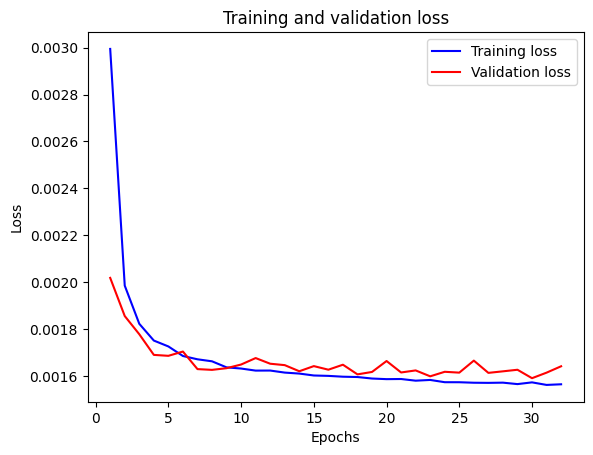

In [16]:
train_and_plot_loss()

### Dự đoán và đánh giá theo R^2 score

In [17]:
import sys
import os
from sklearn.metrics import r2_score

# Load model
model = load_model("final_model.h5")
model2 = joblib.load('random_forest_model.pkl')

# Tính toán R-squared
predict_1 = model.predict(X_test)
r_squared_1 = r2_score(y_test, predict_1)

predict_2 = model2.predict(X_test)
r_squared_2 = r2_score(y_test, predict_2)



110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Đưa ra ouput

(a) Chi tiêu cố định: Tương ứng số tiền chi tiêu phục vụ cho nhu cầu chi tiêu cần thiết như tiền thuê nhà; tiền điện, nước; tiền ăn uống; xăng xe hoặc vé xe; tiền internet và điện thoại; …. Đảm bảo cho việc chi trả các khoản chi phí cần thiết thường ngày.

(b) Tiết kiệm: Tương ứng với số tiền chi tiêu phục vụ cho nhu cầu tiết kiệm và đầu tư như: tiết kiệm hưu trí, đầu tư cổ phiếu hoặc quỹ, những khoản chi tiêu lớn như mua nhà, mua xe, … 

(c) Bản thân: Tương ứng với số tiền chi tiêu phục vụ cho các hoạt động vui chơi, giải trí, thể thao, du lịch, mua sắm, đi ăn ngoài, nhà hàng, xem phim, …

(d) Giáo dục: Tương ứng với số tiền chi tiêu phục vụ cho mục tiêu giáo dục và phát triển bản thân: các khóa học; sách vở, tài liệu học tập; tham gia hội thảo, workshop; các khóa đào tạo nghề nghiệp hoặc kỹ năng mới, ...

(e) Thanh toán nợ: Tương ứng với số tiền chi tiêu phục vụ cho việc thanh toán các khoản vay nợ cần phải trả

(f) Khác: Tương ứng với số tiền chi tiêu phục vụ cho nhu cầu khác như: từ thiện, y tế, quà cáp, bảo trì, sửa chữa thiết bị, thú cưng và một số khoản chi tiêu phát sinh khác. 


In [18]:
# Tính MSE cho từng mẫu
mse_scores = []
for i in range(len(X_test)):
    mse = mean_squared_error([y_test[i]], [predict_1[i]])
    mse_scores.append(mse)

# Chuyển đổi thành mảng numpy để dễ dàng thao tác
mse_scores = np.array(mse_scores)
# Tạo output_matrix để xuất lưu giữ giá trị dự đoán
output_matrix = []
# Sắp xếp và chọn các mẫu có MSE thấp nhất
# Giả sử bạn muốn chọn 10 mẫu có MSE thấp nhất
top_n = 10
top_indices = np.argsort(mse_scores)[:top_n]

# Lưu các mẫu có MSE thấp nhất và các X_test tương ứng
top_samples = []
top_X_test = []
for idx in top_indices:
    top_samples.append({
        "Sample_index": idx,
        "True_value": y_test[idx],
        "Predicted_value": predict_1[idx],
        "MSE": mse_scores[idx]
    })
    top_X_test.append(X_test[idx])
    temp = []
    for item in de_scale(X_test[idx]):
        temp.append(item)
    for item in predict_1[idx]:
        temp.append(item *temp[0])
    output_matrix.append(temp)

df = pd.DataFrame(output_matrix, columns=["thu nhập",	"cố định",	"nhu cầu",	"giáo dục", "thanh toán nợ",
                                      	"tiết kiệm",	"bản thân",	"a",	"b",	"c",	"d",	"e",	"f"])
df = df.round()
pd.set_option('display.float_format', '{:.0f}'.format)
df



,thu nhập,cố định,nhu cầu,giáo dục,thanh toán nợ,tiết kiệm,bản thân,a,b,c,d,e,f
0,167663371,9794618,0,0,0,1,1,12484312,49835819,48614156,47494503,0,8866023
1,174196295,13767708,1,1,0,0,1,16484901,21580748,61467061,61155963,0,11570461
2,135042994,6795855,1,1,0,0,1,9124150,16545375,49058205,49310080,0,10050786
3,195478323,8398082,0,0,8470588,0,1,11418793,22542631,70168165,68165753,8725199,13984615
4,199361677,10335911,0,1,0,1,1,13460421,58087983,58875996,57846505,0,9841465
5,135779041,9653882,0,0,0,0,1,11626419,16220660,49226965,49311602,0,9042143
6,188641729,6460254,0,1,0,0,1,9661352,25061805,69184917,69067496,0,14272238
7,191322470,13648624,0,0,8470588,0,1,16768906,20969751,66787645,64672748,7975419,12561675
8,147732774,8224869,0,1,0,0,1,10773952,18326346,53604702,53618276,0,10394710
9,171032899,12468605,0,1,0,0,1,15102532,20995591,61016131,60643166,0,12023619
